In [5]:
import pandas as pd

# Load the CSV file
file_path = r"D:\INTERNSHIP\SKILLFIED\CLIENT SUBSCRIBED TO A TERM DEPOSIT - 2ND PROJECT\PROJECT\downloaded-file (1)\bankmarketing.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [7]:
# Check for missing values
print(df.isnull().sum())

# Convert categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)

# Encode the target variable: yes=1, no=0
df_encoded['y'] = df['y'].map({'yes': 1, 'no': 0})


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [9]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[7058  245]
 [ 480  455]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.65      0.49      0.56       935

    accuracy                           0.91      8238
   macro avg       0.79      0.73      0.75      8238
weighted avg       0.90      0.91      0.91      8238

Accuracy: 0.9119932022335518


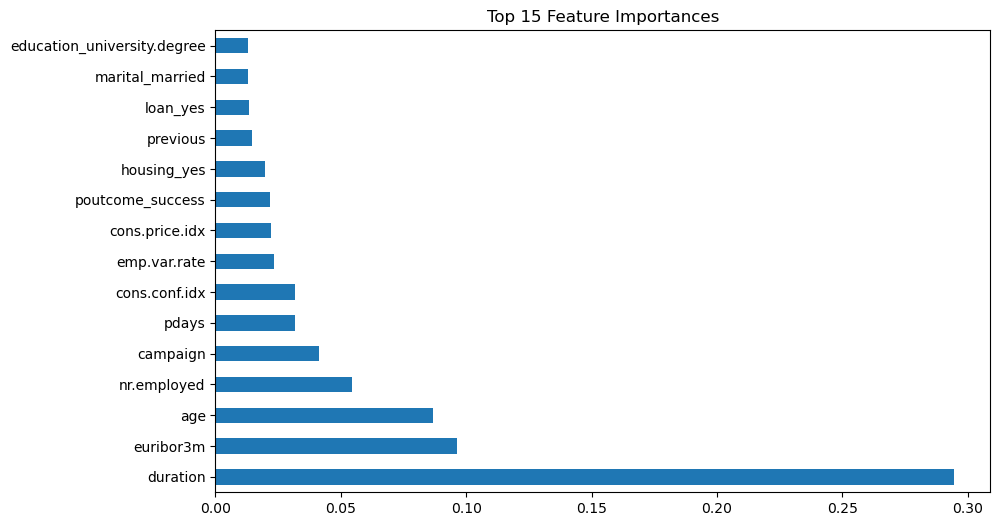

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', figsize=(10, 6))
plt.title("Top 15 Feature Importances")
plt.show()
